In [45]:
import pandas as pd
import numpy as np
import csv
import copy
from collections import defaultdict

In [11]:
#Import all the data

#Households data
vst = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_sortedtrips.csv', encoding = "ISO-8859-1")
wst = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/w_sortedtrips.csv', encoding = "ISO-8859-1")


In [9]:
df_vst = vst[['sampno', 'startgpsplaceid', 'endgpsplaceid']]
df_vst = df_vst.dropna()
df_vst

,sampno,startgpsplaceid,endgpsplaceid
0,1135317,14.0,15.0
1,1135317,15.0,16.0
2,1135317,16.0,18.0
3,1135317,18.0,19.0
4,1135438,1.0,3.0
5,1135438,3.0,4.0
6,1135438,1.0,2.0
8,1135438,2.0,3.0
9,1135955,1.0,2.0
10,1135955,2.0,3.0


In [12]:
df_wst = wst[['sampno', 'startgpsplaceid', 'endgpsplaceid']]
df_wst = df_wst.dropna()
df_wst

,sampno,startgpsplaceid,endgpsplaceid
2,1153453,2.0,3.0
3,1158255,2.0,4.0
4,1172894,5.0,6.0
5,1401091,26.0,27.0
7,1416933,8.0,10.0
9,1533517,2.0,4.0
11,1761307,1.0,2.0
12,1761307,2.0,3.0
17,1821234,7.0,8.0
18,1874245,6.0,7.0


In [13]:
#concatenate dataframes
frames = [df_vst, df_wst]
result = pd.concat(frames)


In [14]:
result

,sampno,startgpsplaceid,endgpsplaceid
0,1135317,14.0,15.0
1,1135317,15.0,16.0
2,1135317,16.0,18.0
3,1135317,18.0,19.0
4,1135438,1.0,3.0
5,1135438,3.0,4.0
6,1135438,1.0,2.0
8,1135438,2.0,3.0
9,1135955,1.0,2.0
10,1135955,2.0,3.0


In [19]:
test = result.head(n=20)
test

,sampno,startgpsplaceid,endgpsplaceid
0,1135317,14.0,15.0
1,1135317,15.0,16.0
2,1135317,16.0,18.0
3,1135317,18.0,19.0
4,1135438,1.0,3.0
5,1135438,3.0,4.0
6,1135438,1.0,2.0
8,1135438,2.0,3.0
9,1135955,1.0,2.0
10,1135955,2.0,3.0


In [23]:
start = defaultdict(int)
end = defaultdict(int)


for row in result.values:
    snum = row[0]
    start_loc = row[1]
    end_loc = row[2]
    
    if start[start_loc] == 0:
        start[start_loc] = 1
        
    elif start[start_loc] != 0:
        start[start_loc] += 1
        
    if end[end_loc] == 0:
        end[end_loc] = 1
        
    elif end[end_loc] != 0:
        end[end_loc] += 1

    

In [24]:
start

defaultdict(int,
            {14.0: 319,
             15.0: 245,
             16.0: 181,
             18.0: 97,
             1.0: 7083,
             3.0: 4827,
             2.0: 6012,
             4.0: 4124,
             5.0: 3352,
             6.0: 2704,
             7.0: 2147,
             8.0: 1688,
             9.0: 1278,
             10.0: 1013,
             11.0: 726,
             12.0: 562,
             13.0: 453,
             20.0: 66,
             21.0: 43,
             23.0: 22,
             17.0: 119,
             19.0: 66,
             24.0: 16,
             25.0: 21,
             26.0: 15,
             33.0: 5,
             32.0: 3,
             22.0: 27,
             27.0: 9,
             28.0: 6,
             29.0: 4,
             30.0: 3,
             31.0: 2,
             34.0: 3,
             49.0: 1,
             36.0: 1})

In [25]:
end

defaultdict(int,
            {15.0: 351,
             16.0: 281,
             18.0: 149,
             19.0: 102,
             3.0: 5650,
             4.0: 4910,
             2.0: 6257,
             5.0: 4189,
             6.0: 3479,
             7.0: 2852,
             8.0: 2273,
             9.0: 1791,
             10.0: 1417,
             11.0: 1067,
             12.0: 801,
             13.0: 636,
             14.0: 471,
             20.0: 95,
             21.0: 67,
             23.0: 35,
             24.0: 24,
             22.0: 42,
             17.0: 185,
             25.0: 29,
             26.0: 20,
             33.0: 8,
             35.0: 3,
             27.0: 18,
             32.0: 3,
             36.0: 3,
             28.0: 8,
             29.0: 7,
             39.0: 1,
             30.0: 6,
             31.0: 5,
             34.0: 5,
             50.0: 1,
             38.0: 1,
             37.0: 1})

In [63]:
#turn a dictionary into a dataframe
end_count_df = pd.DataFrame(list(end.items()), columns=['gpsend', 'count'])

#turn a dictionary into a dataframe
start_count_df = pd.DataFrame(list(start.items()), columns=['gpsend', 'count'])
start_count_df

,gpsend,count
0,14.0,319
1,15.0,245
2,16.0,181
3,18.0,97
4,1.0,7083
5,3.0,4827
6,2.0,6012
7,4.0,4124
8,5.0,3352
9,6.0,2704


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1238afd68>,
      dtype=object)

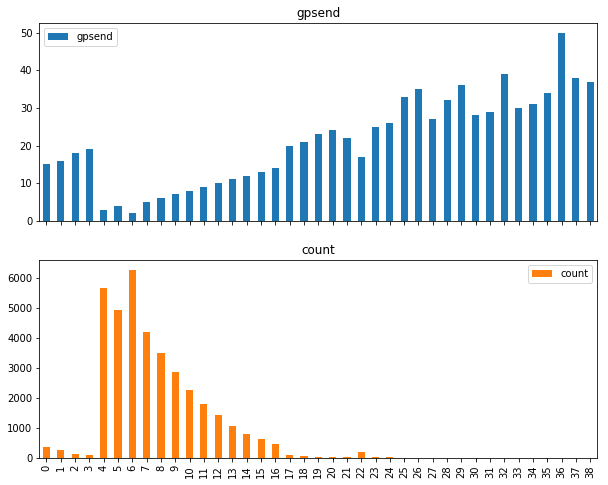

In [64]:
end_count_df.plot(kind = 'bar', figsize=(10,8), subplots =True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123b17940>,
      dtype=object)

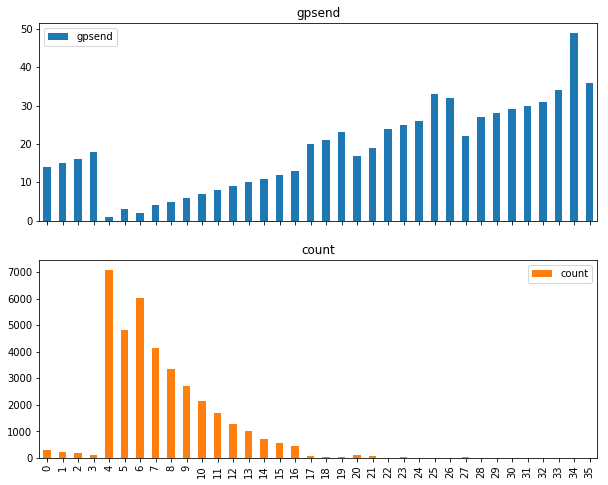

In [65]:
start_count_df.plot(kind = 'bar', figsize=(10,8), subplots =True)